In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = []
y = []

X= np.loadtxt('./data_files/data_x.txt', dtype=float, delimiter=',', encoding='bytes')
y= np.loadtxt('./data_files/data_y.txt', dtype=float, delimiter=',', encoding='bytes')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
ann = tf.keras.models.Sequential()

In [6]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [7]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=3, activation='tanh'))

In [10]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=10, verbose=0)

In [12]:
y_pred = ann.predict(X_test)


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[39  0  0]
 [ 1 11  0]
 [ 9  0 20]]


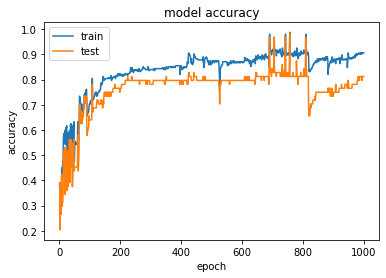

In [14]:
# summarize history for accuracy
plt.figure(1)  

# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 